In [56]:
# %pip install scipy
# %pip install soundfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from si_prefix import si_format
import mc_helper
from thdn_calc import THDN

1: unbalanced (pMOS width = 3)
2: semi-balanced (pMOS width = 6)
3: balanced (pMOS width = 8)

   time   i(VIin)   v(Vout)
0   0.0 -0.000001  0.275907
   time   i(VIin)   v(Vout)
0   0.0 -0.000001  0.275907


/home/madvlsi/dev/git/magic-dds/simulations/switched_capacitor/mc_helper.py:13: RuntimeWarning: divide by zero encountered in log10
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)
/home/madvlsi/dev/git/magic-dds/simulations/switched_capacitor/mc_helper.py:13: RuntimeWarning: invalid value encountered in scalar remainder
  precision = max(0, sigfigs - np.floor(np.log10(abs(val))) % 3 - 1)


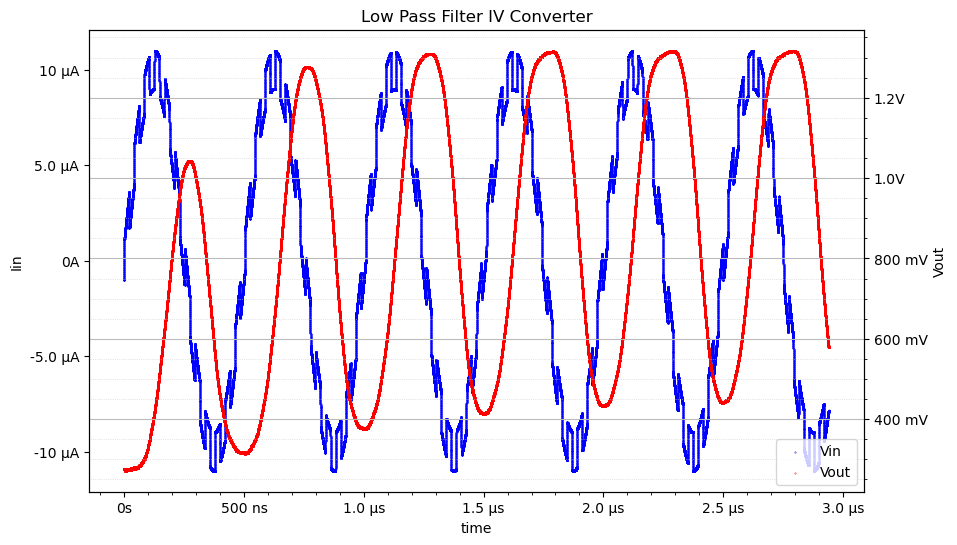

In [57]:
filename = "sin_out_3.txt"
df = pd.read_csv(filename, delimiter = "\s+")
print(df.head(1))
df.rename({"v(Vin)": "Vin", "v(Vout)": "Vout"}, inplace = True)
print(df.head(1))

fig, ax1 = plt.subplots(figsize = (10, 6))
ax2 = ax1.twinx()
mc_helper.axes_labels("time", "s", "Iin", "A", "", ax1)
mc_helper.axes_labels("time", "s", "Vout", "V", "Low Pass Filter IV Converter", ax2)
mc_helper.make_grids()
ax1.scatter(df["time"], df["i(VIin)"], s = 0.1, color = "blue", label = "Vin")
ax2.scatter([], [], s = 0.1, color = "blue", label = "Vin")
ax2.scatter(df["time"], df["v(Vout)"], s = 0.1, color = "red", label = "Vout")
plt.legend(loc = "lower right")

In [58]:
sample_rate = 1 / np.diff(df["time"])[0]
thd = THDN(df["v(Vout)"], sample_rate)
# thd = THDN(df[df["time"] > 1.5e-6]["v(Vout)"], sample_rate)
print(thd) # 18.8777% or -14.5 dB

Frequency: 201094625.075829 Hz
THD+N:     17.2307% or -15.3 dB
None
